# MSc in AI - CE6002 & CS5062


# E-tivity 3: Basic Techniques for Learning
# Task 3

## Student Name: Mark Murnane
## Student ID: 18195326


## Existing Code

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(n_samples=1000, noise = 0.05)
y = [yy if yy == 1 else -1 for yy in y] 

### Visualise the Data Set

In [3]:
import pandas as pd
import seaborn as sns

In [4]:
tf = pd.concat([pd.DataFrame(X, columns=['X1', 'X2']), pd.DataFrame(y, columns=['y'])], axis=1)
tf.head()

,X1,X2,y
0,0.599142,-0.647370,1
1,-0.706969,-0.236226,1
2,-0.439992,-0.942366,-1
3,-0.605385,0.797565,-1
4,0.550606,-0.391731,1


In [5]:
np.unique(tf['y'].values)

array([-1,  1], dtype=int64)

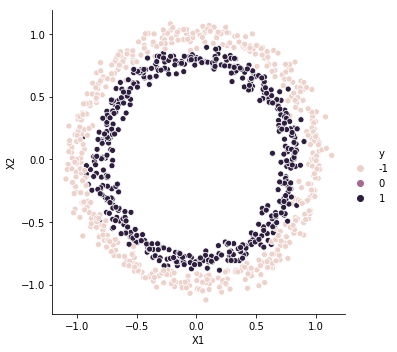

In [6]:
sns.relplot(x='X1', y='X2', hue='y', data=tf)
plt.show()

## Task 3

### Linear Classification Implementation

In [7]:
def calc_error(y_predict, y_actual):
    errors=0
    for x,y in zip(y_predict, y_actual):
        if (x!=y):
            errors+=1;
    return errors/len(y_actual)

In [8]:
class MyLinearClassifier(object):
    
    """Implementation of simple Linear Classification algorithm based on the algorithm outlined
       in Learning from Data, Chapter 3"""
    
    # Simple initialiser to make sure we have a instance variable for weights
    def __init__(self):
        self.weights_ = np.empty((1,3))

    # Fit function to determine the weights to be used by the classifer
    # This algorithm is based on Learning from Data, p.86 
    def fit(self, X_in, y_in):

        # Add the bias coordinate to the input array
        X = np.hstack((np.ones((X_in.shape[0],1)), X_in))

        # Pseudo-code
        #w = (((X^transpose@X)^-1)X^transpose)@y       

        # Do this the long way for understanding for now
        # Shorthand Xd = np.linalg.pinv(X)
        Xt = np.transpose(X)
        Xd = np.matmul(np.linalg.inv(np.matmul(Xt, X)), Xt)

        self.weights_ = np.matmul(Xd, y_in)

    # Predicts a set of output classes (y^) based in the input attributes and this model's weights
    def predict(self, X_in):
        X = np.hstack((np.ones((X_in.shape[0],1)), X_in))
        y_hat = np.matmul(X, self.weights_)

        return np.sign(y_hat)
    
    
    def score(self, X_in):
        X = np.hstack((np.ones((X_in.shape[0],1)), X_in))
        y_hat = np.matmul(X, self.weights_)

        return y_hat



In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [10]:
mlc = MyLinearClassifier()
mlc.fit(X_train, y_train)

y_hat = mlc.predict(X_train)

print(np.unique(y_train, return_counts=True))
print(np.unique(y_hat, return_counts=True))

(array([-1,  1], dtype=int64), array([408, 392], dtype=int64))
(array([-1.,  1.]), array([584, 216], dtype=int64))


In [11]:
e_in = calc_error(y_hat, y_train)
print(e_in)

0.525


In [12]:
mlc2 = MyLinearClassifier()
mlc2.fit(X, y)

y_hat = mlc.predict(X)

print(np.unique(y, return_counts=True))
print(np.unique(y_hat, return_counts=True))

(array([-1,  1], dtype=int64), array([500, 500], dtype=int64))
(array([-1.,  1.]), array([721, 279], dtype=int64))


### Results

The value of $E_{in}$ demonstrates that simple Linear Classification of the sample cannot be achieved.  The error rate is approaching 50%.  This stands to reason, however, as the scatter plot shows that there is no straight line that could be drawn through the sample space that would not results in 50% of the samples being classified. 

### New Feature Creation

The plot shows that the data creates a circular plot which clearly can't be linearly separated.  To separate the two classes we'll need to use a non-linear transformation.  

The simplest feature to add is to square the values In this case the following feature can be added:

$
\quad\quad
X{_1}sq = (X_1)^2
\\
\quad\quad
X{_2}sq = (X_2)^2
$

This is a viable approach as the Linear Classification/Regression algorithm is linear in the weights.  The values of $X$ are essentially constants in the equation so if they are squared it doesn't impact the linear nature of the calculation.


In [13]:
X_new_train = np.square(X_train)
X_new_test = np.square(X_test)

In [14]:
mlc3 = MyLinearClassifier()
mlc3.fit(X_new_train, y_train)

y_hat = mlc3.predict(X_new_train)

print(f"Distribution of classes in the training set:\t{np.unique(y_train, return_counts=True)}")
print(f"Distribution of classes in the predicted set:\t{np.unique(y_hat, return_counts=True)}")

e_in = calc_error(y_hat, y_train)
print(f"The In-Sample error E_in is: {e_in}")

Distribution of classes in the training set:	(array([-1,  1], dtype=int64), array([408, 392], dtype=int64))
Distribution of classes in the predicted set:	(array([-1.,  1.]), array([408, 392], dtype=int64))
The In-Sample error E_in is: 0.0275


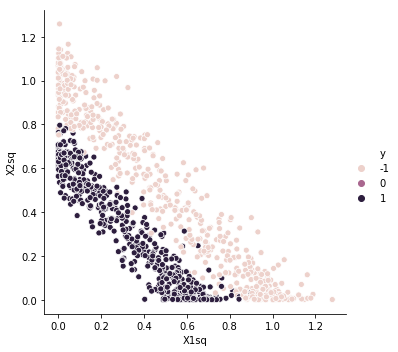

In [15]:
tf['X1sq'] = tf['X1']**2
tf['X2sq'] = tf['X2']**2

sns.relplot(x='X1sq', y='X2sq', hue='y', data=tf)

By creating new features (_X1sq_ and _X2sq_ ) that represented the transformed the data non-linearly, a new representation of the data was created in the $Z$ space.  As the plot above shows, in this space the data is linearly separable and the implementation of Linear Classification can be used to classify the data.

As the output from _mlc3_ shows, the in-sample error $E_{in}$ drops from 49.375% to 2.25%.

### Logistic Regression



In [16]:
# Create Logistic Regression solver instance.  Used lbfgs due to small data set size
logit = LogisticRegression(solver='lbfgs', max_iter=1000)

# Try logistic regression on the original data set
logit.fit(X_train, y_train)

y_hat = logit.predict(X_train)
logit_e_in = calc_error(y_hat, y_train)

print(f"The In-Sample error E_in for Logistic Regression with original data is: {logit_e_in} ({logit.n_iter_} iterations)")

logit.fit(X_new_train, y_train)
y_hat = logit.predict(X_new_train)
logit_e_in = calc_error(y_hat, y_train)

print(f"The In-Sample error E_in for Logistic Regression with new features is: {logit_e_in} {logit.n_iter_} iterations")


The In-Sample error E_in for Logistic Regression with original data is: 0.52625 ([4] iterations)
The In-Sample error E_in for Logistic Regression with new features is: 0.02375 [14] iterations


The Logistic Regression function uses a different approach.  Rather than solving directly as the Linear Classification implementation does, it minimises a cost function. While the algorithm is more flexible than the simple classifier above, for a simple scenario it required multiple iterations vs. single iteration.

Importantly, the results generated by the two models for both the initial and new features are very similar.  This similarity shows that for an appropriate data set, Linear Regression/Classification can be a computationally efficient way to solve/take a good first pass at identifying $h(x)$